**LGMVIP - DATA SCIENCE(VIP)**

**AUTHOR - Golla Machilikanth Yadav**

**Task -Develop A Neural Network That Can Read Handwriting**

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners



In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

Step2:Load the MNIST dataset.we make a split of train and test set with 60k samples in training and 10k samples in test

In [3]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train=mnist_train_images.reshape(60000,784)
test=mnist_test_images.reshape(10000,784)

We also convert the input to the format which keras accepts.As the input is pixel values the value range is between[0-255].we change it to between[0-1]

In [7]:
train=train.astype('float32')
test=test.astype('float32')
train/=255
test/=255

Next we do the conversion of labels/dependent variables to one hot encoding vectors.This will help us in the classification process by converting the numbers/degits to an encoded vector

In [9]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

Step 3:Visualizing the dataset. We use matplotlib to just see how the dataset looks like.

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


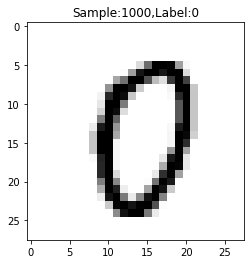

In [11]:
import matplotlib.pyplot as plt
def display(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train[num].reshape([28,28])
  plt.title('Sample:%d,Label:%d'%(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
display(1000)

Step 4:Building Sequential model in Neural network

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Step 5:Model Optimization

In [26]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Step 6: Fitting the training data to the model

In [29]:
 history=model.fit(train,train_labels,batch_size= 100, epochs=10, verbose=2,validation_data=(test,test_labels))

Epoch 1/10
600/600 - 10s - loss: 0.2329 - accuracy: 0.9288 - val_loss: 0.1089 - val_accuracy: 0.9649 - 10s/epoch - 16ms/step
Epoch 2/10
600/600 - 9s - loss: 0.1013 - accuracy: 0.9699 - val_loss: 0.0749 - val_accuracy: 0.9762 - 9s/epoch - 14ms/step
Epoch 3/10
600/600 - 9s - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.0787 - val_accuracy: 0.9767 - 9s/epoch - 14ms/step
Epoch 4/10
600/600 - 8s - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0747 - val_accuracy: 0.9803 - 8s/epoch - 14ms/step
Epoch 5/10
600/600 - 9s - loss: 0.0515 - accuracy: 0.9850 - val_loss: 0.0751 - val_accuracy: 0.9821 - 9s/epoch - 14ms/step
Epoch 6/10
600/600 - 9s - loss: 0.0469 - accuracy: 0.9868 - val_loss: 0.0837 - val_accuracy: 0.9814 - 9s/epoch - 14ms/step
Epoch 7/10
600/600 - 9s - loss: 0.0416 - accuracy: 0.9883 - val_loss: 0.0934 - val_accuracy: 0.9807 - 9s/epoch - 14ms/step
Epoch 8/10
600/600 - 9s - loss: 0.0386 - accuracy: 0.9893 - val_loss: 0.0850 - val_accuracy: 0.9823 - 9s/epoch - 14ms/step
Epoch 9/10
600

Step 7: Model Evaluation

In [30]:
score = model.evaluate(test,test_labels,verbose = 0)
print("Test loss",score[0])
print("Test accuracy",score[1])

Test loss 0.09566596150398254
Test accuracy 0.983299970626831


Finding which numbers have been wrongly predicted.

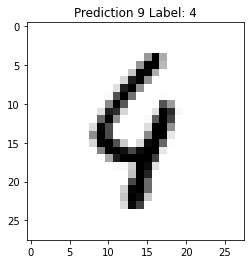

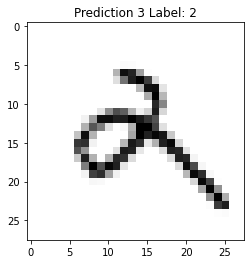

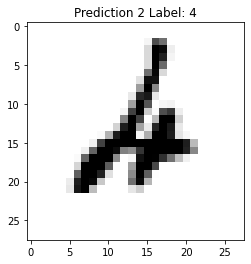

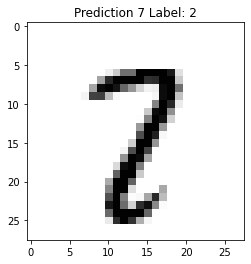

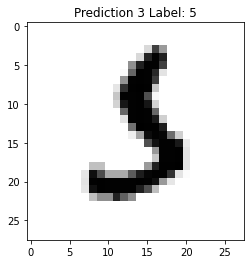

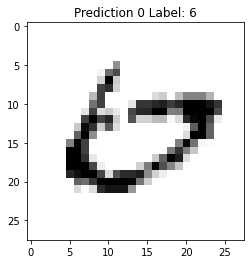

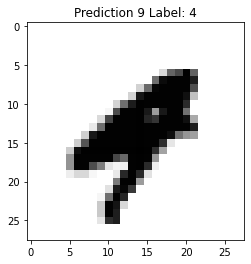

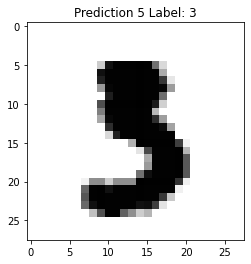

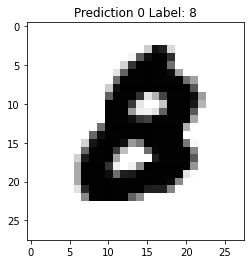

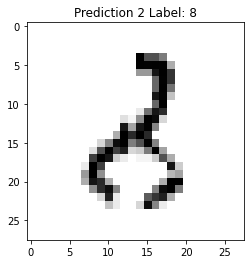

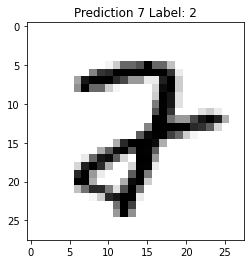

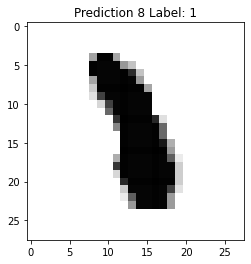

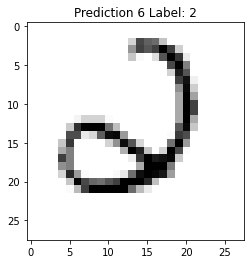

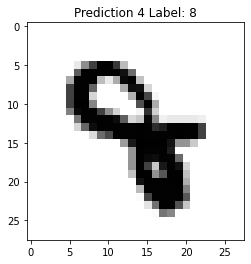

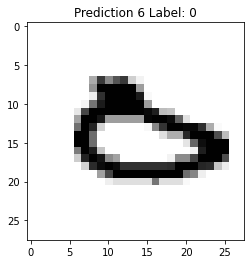

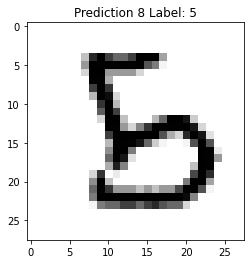

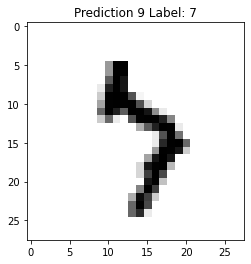

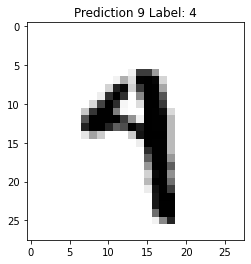

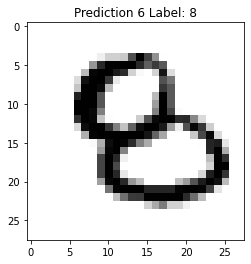

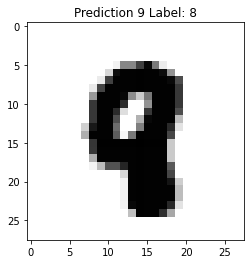

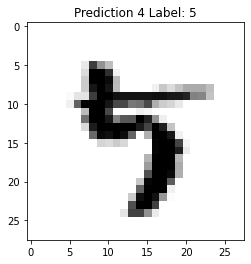

In [31]:
for x in range(1000):
  test_image=test[x,:].reshape (1,784) 
  predicted_cat=model.predict(test_image).argmax()
  label=test_labels[x].argmax() 
  if (predicted_cat != label):
    plt.title( 'Prediction %d Label: %d'% (predicted_cat, label)) 
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap( 'gray_r'))
    plt.show()

#----------------------------------ThankYou----------------------------------